 # **Kaggle Titanic Competition**

This is a solution to the intro competition on kaggle.com, Still figuring out the programming aspect to ML, so comments in code are mostly my attempts at absorbing concepts.



# The Data

---



In [56]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Github data links
train_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/BrodySpearman/Kaggle-Titanic/main/data/test.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

Showing sample data.

In [72]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Investigating Initial Data



---





pd.info() is used to look for Null entries in our data.

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [89]:
data_total = len(train_df.index)
survivors = train_df['Survived'][train_df['Survived']==1].count()
deaths = train_df['Survived'][train_df['Survived']==0].count()

print(f'Data Sample Total: {data_total} \n')
print(f'Total survivors: {survivors}')
print(f'Total deaths: {deaths}')

Data Sample Total: 891 

Total survivors: 342
Total deaths: 549


In [71]:
# Finding amount of male survivors
men = train_df.loc[train_df.Sex == 'male']['Survived']
m_survival = sum(men) / len(men)
m_surv_count = sum(men)

print(f'Male survival rate: {round(m_survival * 100, 3)}%')
print(f'Total male survivors: {m_surv_count}')

Male survival rate: 18.891%
Total male survivors: 109


In [88]:
# Finding amount of female survivors
women = train_df.loc[train_df.Sex == 'female']['Survived']
w_survival = sum(women) / len(women)
w_surv_count = sum(women)

print(f'Female survival rate: {round(w_survival * 100, 3)}%')
print(f'Total female survivors: {w_surv_count}')

Female survival rate: 74.204%
Total female survivors: 233


# Visualizing Initial Data

---



Setting up our Visualization Libraries.

In [ ]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

print("Setup Complete")

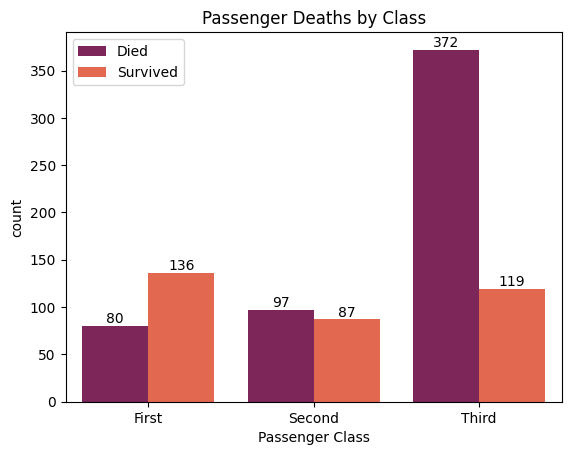

In [65]:
i_class_survival = sns.countplot(data=train_df,
                                 x='Pclass',
                                 hue='Survived',
                                 palette='rocket',
                                 saturation=.85
                               )

i_class_survival.set(title='Passenger Deaths by Class',
                   xticklabels=['First', 'Second', 'Third'],
                   xlabel='Passenger Class')

i_class_survival.legend(labels = ['Died', 'Survived'])

for container in i_class_survival.containers:
  i_class_survival.bar_label(container)

[Text(0.5, 1.0, 'Passenger Survivability by Age and Fare Cost')]

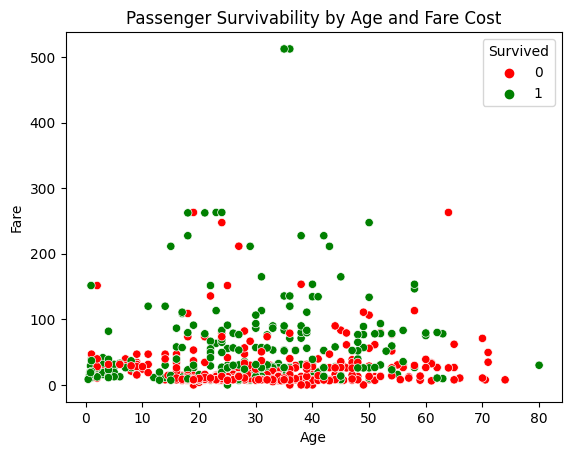

In [75]:
scatter = sns.scatterplot(data=train_df,
                          x='Age',
                          y='Fare',
                          hue='Survived',
                          palette=['red', 'green']
                          )

scatter.set(title='Passenger Survivability by Age and Fare Cost')

# Random Forest Classifier

---



In [64]:
# Testing data Using random forest Classification
y = train_df['Survived']

# Features for decision nodes in the model.
features = ['Pclass', 'Sex', 'SibSp'] 

# pd.get_dummies() categorizes the features into numerical values.
# Important for columns like 'Sex', Male/Female == 0/1.
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

# n_estimators = num of decision trees | max_depth = depth of trees.
# random_state ??? Might control which features to be used in the decision nodes.
# Might also control which part of the dataset is used in the process? Unsure.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# model.predict() produces an output using the fitted model and test data.
predictions = model.predict(X_test)

# Creates output csv using a new dataframe with our predictions.
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('predictions.csv', index=False)

# Joins the prediction and test dataframes to fit the new predicted column.
full_predict = output.set_index('PassengerId').join(test_df.set_index('PassengerId'))

print('predictions added.')

predictions added.


# Evaluating Predictions

---



In [61]:
full_predict.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Visualizing Predictions.

---



Taking a look at Passenger survival rates by Ticket Class. 
Deaths within our prediction data seem to trend higher as we move down 
the class structure, though this could be partly attributed to the 
amount of passengers in each class.

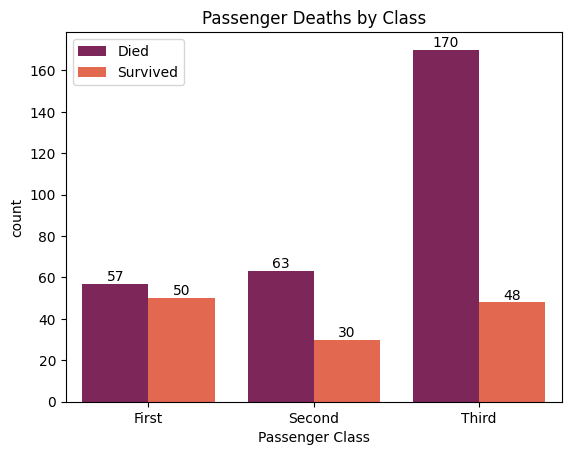

In [62]:
class_survival = sns.countplot(data=full_predict, 
                               x='Pclass', 
                               hue='Survived', 
                               palette='rocket', 
                               saturation=.85
                               )

class_survival.set(title='Passenger Deaths by Class',
                   xticklabels=['First', 'Second', 'Third'],
                   xlabel='Passenger Class')

class_survival.legend(labels = ['Died', 'Survived'])

for container in class_survival.containers:
  class_survival.bar_label(container)

[Text(0.5, 1.0, 'Passenger Survivability by Age and Fare Cost')]

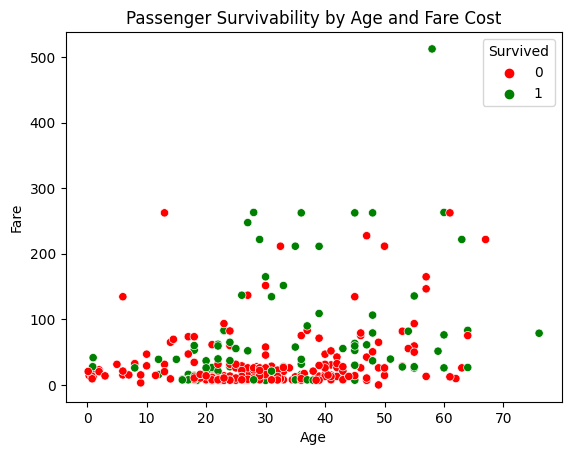

In [63]:
scatter = sns.scatterplot(data=full_predict,
                          x='Age',
                          y='Fare',
                          hue='Survived',
                          palette=['red', 'green']
                          )

scatter.set(title='Passenger Survivability by Age and Fare Cost')